In [3]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import cifar10


In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
import numpy as np
#Unique classes in the image 
num_unique_classes = len(np.unique(y_train))
print("Number of unique classes:", num_unique_classes)

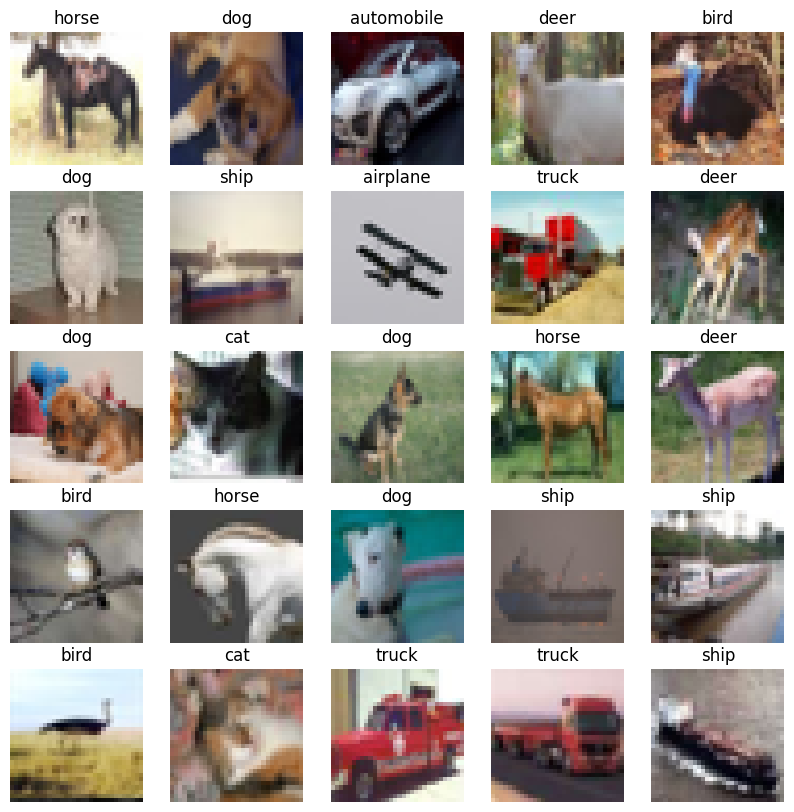

In [5]:
import matplotlib.pyplot as plt
#define predefined class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#visualize the data 
plt.figure(figsize= (10, 10))
for i in range(25):
    ax = plt.subplot(5, 5,  i+1) #takes num of rows, num of columns and index of the subplot
    rand_index = tf.random.uniform([], 0, len(X_train), dtype= tf.int32)
    plt.imshow(X_train[rand_index])
    plt.title(class_labels[int(y_train[rand_index])])
    plt.axis("off")
plt.show()


In [6]:
X_train , y_train = X_train/255. , y_train/255. 

In [ ]:
#    model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=[28, 28]),
#         tf.keras.layers.Dense(300, activation="relu"),
#         tf.keras.layers.Dense(100, activation="relu"),
#         tf.keras.layers.Dense(10, activation="softmax")
# ])

In [17]:
from tensorflow.keras import models, layers
def create_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    
    # Add 20 hidden layers with 100 neurons each
    for _ in range(20):
        model.add(layers.Dense(100, activation='swish', kernel_initializer='he_normal'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.2))
    
    # Output layer
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model

model = create_model()


In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)
model.fit(X_train, y_train, epochs = 20, validation_data= (X_test, y_test), callbacks = [early_stopping])


Epoch 1/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0237e-04 - accuracy: 0.1000 - val_loss: 3917.9612 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 44s 28ms/step - loss: 3.4886e-05 - accuracy: 0.1000 - val_loss: 5345.4658 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5246e-05 - accuracy: 0.1000 - val_loss: 5906.3999 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 7.2103e-06 - accuracy: 0.1000 - val_loss: 8725.4873 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 29s 18ms/step - loss: 3.9462e-06 - accuracy: 0.1000 - val_loss: 6866.4448 - val_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1074e-06 - accuracy: 0.1000 - val_loss: 6570.8535 - val_accuracy: 0.1000


In [31]:
def model_built(alpha = 0.0):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))

    for _ in range(20):
        model.add(layers.Dense(100, activation="selu", kernel_initializer="lecun_uniform"))
        if alpha > 0:
            model.add(layers.AlphaDropout(alpha))

    # output layer
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

model = model_built(alpha = 0.3) 

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
1563/1563 [==============================] - 52s 26ms/step - loss: 0.0025 - accuracy: 0.0999 - val_loss: 10.0134 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3468e-07 - accuracy: 0.1000 - val_loss: 9.6891 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 9.8944e-10 - accuracy: 0.1000 - val_loss: 9.3441 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 32s 21ms/step - loss: 2.1458e-11 - accuracy: 0.1000 - val_loss: 8.7629 - val_accuracy: 0.0999
Epoch 5/20
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3842e-12 - accuracy: 0.1000 - val_loss: 8.0503 - val_accuracy: 0.0865
Epoch 6/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 7.5180 - val_accuracy: 0.0672
Epoch 7/20
1563/1563 [==============================] - 26s 16ms/step - loss: 0.0000e+00 - accuracy: 0.

In [32]:
# Evaluate the model's accuracy with standard dropout during testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy with Alpha Dropout:", test_acc)

313/313 [==============================] - 3s 6ms/step - loss: 3.5792 - accuracy: 0.1013
Test accuracy with Alpha Dropout: 0.10130000114440918


In [34]:
prediction = []
dropout_model = model_built(alpha = 1.0)
dropout_model.set_weights(model.get_weights())
prediction.append(dropout_model.predict(X_test))

313/313 [==============================] - 2s 5ms/step


In [37]:
ensemble_pred = tf.reduce_mean(prediction, axis = 0)
ensemble_acc = tf.keras.metrics.categorical_accuracy(y_test, ensemble_pred)

In [40]:
ensemble_acc_value = ensemble_acc.numpy()  # Convert to NumPy value
print("Test accuracy with MC Dropout Ensemble:", ensemble_acc_value)

Test accuracy with MC Dropout Ensemble: [0. 0. 0. ... 0. 0. 0.]
